# Analyse de l'enquête SUMER de 2017

## Résumé

L'enquête SUMER 2017, réalisée par la DARES et d'autres partenaires, offre un panorama détaillé des expositions professionnelles en France, couvrant 24,8 millions de salariés.  
Elle met en lumière les risques spécifiques auxquels sont confrontés les travailleurs, avec une analyse sectorielle fine entre la fonction publique (État, territoriale, hospitalière) et le secteur privé.

Dans la fonction publique de l’État (2 070 300 salariés), les contraintes organisationnelles dominent.  
Près de 80 % des salariés sont en contact direct avec le public, tandis que 63,6 % rapportent des interactions parfois tendues.  
Les contraintes physiques affectent 55,8 % des salariés, notamment par des postures contraignantes (41,6 % debout) et des déplacements fréquents (29,1 %). Sur le plan psychosocial, 61,1 % signalent un manque de reconnaissance, et 22,2 % sont en "job strain", une combinaison de forte demande psychologique et de faible autonomie.

La fonction publique territoriale (1 981 200 salariés) se distingue par des contraintes physiques particulièrement marquées.  
Environ 80,6 % subissent des postures contraignantes, et 51,9 % se déplacent fréquemment à pied.  
De plus, 38,2 % manipulent des charges lourdes. Les nuisances sonores touchent 43,1 % des employés, tandis que les nuisances thermiques concernent 30,2 %.  
En matière de risques chimiques, 38,5 % sont exposés, notamment à l’ammoniac, aux carburants, et aux solvants.  
Psychosocialement, 47,6 % des salariés ressentent un manque de reconnaissance, et 23,4 % vivent des conditions de "job strain".

Dans la fonction publique hospitalière (1 189 300 salariés), les risques biologiques sont prépondérants, avec 43 % des travailleurs exposés à des agents biologiques, particulièrement dans les soins d’hygiène (8,6 %) ou la manipulation de déchets (10,4 %).  
Les contraintes physiques sont également importantes : 53 % travaillent debout, et 39 % signalent des postures rachidiennes contraignantes.  
Par ailleurs, 33,7 % des employés, majoritairement des femmes (77,7 %), occupent des fonctions de service ou administratives.  
Les conditions psychosociales sont difficiles : 17,4 % subissent des comportements hostiles, et 23,4 % sont en "job strain".

Globalement, le secteur privé, bien que distinct, partage des problématiques similaires, avec des niveaux d’exposition élevés dans certains secteurs spécifiques, mais il reste globalement moins exposé aux risques biologiques que la fonction publique hospitalière.

Ces résultats soulignent des problématiques majeures de santé au travail et servent de base pour cibler des actions de prévention adaptées à chaque secteur, en tenant compte des expositions spécifiques et des profils professionnels diversifiés.

## Tables de données

### Création des DataFrames 

In [220]:
import pandas as pd
import numpy as np

In [221]:
dataProfilCateg = [['Public', 'Cadres et prof. intellect. sup.', 14.7, 16.8],
              ['Public', 'Professions intermédiaires', 13.8, 22.9],
              ['Public', 'Employés administratifs', 3.1, 8.4],
              ['Public', 'Employés de commerce et de service', 14.0, 3.8],
              ['Public', 'Ouvriers qualifiés', 2.0, 0.2],
              ['Public' ,'Ouvriers non qualifiés/agricoles', 0.3, 0.1],
              ['Territoriale', 'Cadres et prof. intellect. sup.', 2.1, 5.9],
              ['Territoriale', 'Professions intermédiaires', 3.0, 12.0],
              ['Territoriale', 'Employés administratifs', 1.7, 16.3],
              ['Territoriale', 'Employés de commerce et de service', 3.8, 21.4],
              ['Territoriale', 'Ouvriers qualifiés', 19.3, 3.5],
              ['Territoriale', 'Ouvriers non qualifiés/agricoles', 9.2, 2.0],
              ['Hospitalière', 'Cadres et prof. intellect. sup.', 5.9, 7.1],
              ['Hospitalière', 'Professions intermédiaires', 6.1, 31.9],
              ['Hospitalière', 'Employés administratifs', 0.5, 6.8],
              ['Hospitalière', 'Employés de commerce et de service', 5.3, 28.3],
              ['Hospitalière', 'Ouvriers qualifiés', 3.6, 2.8],
              ['Hospitalière', 'Ouvriers non qualifiés/agricoles', 0.8, 0.8],
              ['Privé', 'Cadres et prof. intellect. sup.', 10.5, 6.0],
              ['Privé', 'Professions intermédiaires', 9.9, 8.1],
              ['Privé', 'Employés administratifs', 2.8, 10.9],
              ['Privé', 'Employés de commerce et de service', 6.5, 15.5],
              ['Privé', 'Ouvriers qualifiés', 17.7, 2.2],
              ['Privé', 'Ouvriers non qualifiés/agricoles', 6.4, 3.6]]

dataProfilAge = [['Public', 'Moins de 25 ans', 2.0, 0.9],
                 ['Public', '25 à 29 ans', 4.6, 4.3],
                 ['Public', '30 à 39 ans', 10.2, 12.6],
                 ['Public', '40 à 49 ans', 16.3, 18.4],
                 ['Public', '50 à 59 ans', 12.4, 13.3],
                 ['Public', '60 ans et plus', 2.3, 2.6],
                 ['Territoriale', 'Moins de 25 ans', 1.1, 3.2],
                 ['Territoriale', '25 à 29 ans', 4.8, 3.1],
                 ['Territoriale', '30 à 39 ans', 6.0, 11.1],
                 ['Territoriale', '40 à 49 ans', 11.2, 20.3],
                 ['Territoriale', '50 à 59 ans', 12.3, 18.0],
                 ['Territoriale', '60 ans et plus', 3.6, 5.2],
                 ['Hospitalière', 'Moins de 25 ans', 0.6, 4.5],
                 ['Hospitalière', '25 à 29 ans', 1.4, 8.5],
                 ['Hospitalière', '30 à 39 ans', 5.1, 20.9],
                 ['Hospitalière', '40 à 49 ans', 5.4, 19.0],
                 ['Hospitalière', '50 à 59 ans', 7.5, 20.2],
                 ['Hospitalière', '60 ans et plus', 2.3, 4.7],
                 ['Privé', 'Moins de 25 ans', 4.6, 3.3],
                 ['Privé', '25 à 29 ans', 6.1, 4.8],
                 ['Privé', '30 à 39 ans', 13.9, 10.9],
                 ['Privé', '40 à 49 ans', 13.6, 12.3],
                 ['Privé', '50 à 59 ans', 12.4, 12.1],
                 ['Privé', '60 et plus', 3.0, 2.9]]

dfProfilCateg = pd.DataFrame(dataProfilCateg, columns=['Secteur', 'Cat. socioprofessionnelle', 'Hommes', 'Femmes'])

dfProfilAge = pd.DataFrame(dataProfilAge, columns=['Secteur', 'Tranche d\'âge', 'Hommes', 'Femmes'])

In [222]:
dataExpo = {
    "Effectif": [2070300, 1981200 , 1189300, 19547200],
    "Contraintes physiques (%)": [55.8, 80.6, 82.7, 71.6],
    "Nuisances sonores (%)": [41.5, 43.1, 27.0, 31.4],
    "Exposition aux agents chimiques (%)": [14.6, 38.5, 57.0, 32.1],
    "Manque de reconnaissance (%)": [61.1, 47.6, 57.7, 49.3],
    "Job Strain (%)": [22.2, 23.4, 35.3, 27.2],
    "Comportements hostiles (%)": [17.6, 17.4, 18.5, 15.5],
    "Contact direct avec le public (%)": [79.8, 84.5, 88.5, 71.5],
    "Travail debout (%)": [41.6, 53.0, 65.8, 48.0],
}

dfExpo = pd.DataFrame(dataExpo, index=["Public", "Territoriale", "Hospitalière", "Privé"])

### Indicateurs statistiques

Pourcentage d'hommes et de femmes pour chaque catégorie

In [223]:
PerHommeFemme = dfProfilCateg.groupby(['Cat. socioprofessionnelle'])[['Hommes', 'Femmes']].sum()
totalsHF = PerHommeFemme.sum(axis=1)
PerHommeFemme['Hommes'] = round(PerHommeFemme['Hommes'] / totalsHF * 100, 1)
PerHommeFemme['Femmes'] = round(PerHommeFemme['Femmes'] / totalsHF * 100, 1)
print(PerHommeFemme)


                                    Hommes  Femmes
Cat. socioprofessionnelle                         
Cadres et prof. intellect. sup.       48.1    51.9
Employés administratifs               16.0    84.0
Employés de commerce et de service    30.0    70.0
Ouvriers non qualifiés/agricoles      72.0    28.0
Ouvriers qualifiés                    83.0    17.0
Professions intermédiaires            30.5    69.5


Pourcentage d'hommes et de femmes pour chaque tranche d'âge

In [224]:
PerAgeHF = dfProfilAge.groupby('Tranche d\'âge')[['Hommes', 'Femmes']].sum()
totalsAgeHF = PerAgeHF.sum(axis=1)
PerAgeHF['Hommes'] = round(PerAgeHF['Hommes'] / totalsAgeHF * 100, 1)
PerAgeHF['Femmes'] = round(PerAgeHF['Femmes'] / totalsAgeHF * 100, 1)
print(PerAgeHF)

                 Hommes  Femmes
Tranche d'âge                  
25 à 29 ans        44.9    55.1
30 à 39 ans        38.8    61.2
40 à 49 ans        39.9    60.1
50 à 59 ans        41.2    58.8
60 ans et plus     39.6    60.4
60 et plus         50.8    49.2
Moins de 25 ans    41.1    58.9


Ratio d'hommes et de femmes selon les secteurs

In [225]:
dfProfilTotalSect = dfProfilCateg.groupby("Secteur")[["Hommes", "Femmes"]].sum()
dfProfilTotalSect["Ratio Hommes/Femmes"] = dfProfilTotalSect["Hommes"] / dfProfilTotalSect["Femmes"]
print(dfProfilTotalSect)

              Hommes  Femmes  Ratio Hommes/Femmes
Secteur                                          
Hospitalière    22.2    77.7             0.285714
Privé           53.8    46.3             1.161987
Public          47.9    52.2             0.917625
Territoriale    39.1    61.1             0.639935


Ratio d'hommes et de femmes selon les tranches d'âge

In [226]:
PerAgeHF["Ratio Hommes/Femmes"] = PerAgeHF["Hommes"] / PerAgeHF["Femmes"]
print(PerAgeHF)

                 Hommes  Femmes  Ratio Hommes/Femmes
Tranche d'âge                                       
25 à 29 ans        44.9    55.1             0.814882
30 à 39 ans        38.8    61.2             0.633987
40 à 49 ans        39.9    60.1             0.663894
50 à 59 ans        41.2    58.8             0.700680
60 ans et plus     39.6    60.4             0.655629
60 et plus         50.8    49.2             1.032520
Moins de 25 ans    41.1    58.9             0.697793


Ratio d'hommes et de femmes qui subit des contraintes physiques par secteur

In [234]:
dfExpo["Ratio Hommes/Femmes (Contraintes physiques)"] = (
    dfProfilTotalSect["Hommes"] * dfExpo["Contraintes physiques (%)"] / 100
) / (
    dfProfilTotalSect["Femmes"] * dfExpo["Contraintes physiques (%)"] / 100
)
print(dfExpo)
print(dfExpo[["Contraintes physiques (%)", "Ratio Hommes/Femmes (Contraintes physiques)"]])


              Effectif  Contraintes physiques (%)  Nuisances sonores (%)  \
Public         2070300                       55.8                   41.5   
Territoriale   1981200                       80.6                   43.1   
Hospitalière   1189300                       82.7                   27.0   
Privé         19547200                       71.6                   31.4   

              Exposition aux agents chimiques (%)  \
Public                                       14.6   
Territoriale                                 38.5   
Hospitalière                                 57.0   
Privé                                        32.1   

              Manque de reconnaissance (%)  Job Strain (%)  \
Public                                61.1            22.2   
Territoriale                          47.6            23.4   
Hospitalière                          57.7            35.3   
Privé                                 49.3            27.2   

              Comportements hostiles (%)  

Ratio d'hommes et de femmes qui subit un manque de reconaissance par tranche d'âge et par secteur

In [228]:
dfProfilAge = dfProfilAge.merge(dfExpo["Manque de reconnaissance (%)"], left_on="Secteur", right_index=True)

dfProfilAge["Hommes affectés (%)"] = round(dfProfilAge["Hommes"] * dfProfilAge["Manque de reconnaissance (%)"] / 100, 1)
dfProfilAge["Femmes affectées (%)"] = round(dfProfilAge["Femmes"] * dfProfilAge["Manque de reconnaissance (%)"] / 100, 1)

dfProfilAge["Ratio Hommes/Femmes"] = round(dfProfilAge["Hommes affectés (%)"] / dfProfilAge["Femmes affectées (%)"], 1)

dfProfilAgeRatios = dfProfilAge[["Secteur", "Tranche d'âge", "Hommes affectés (%)", "Femmes affectées (%)", "Ratio Hommes/Femmes"]]
print(dfProfilAgeRatios)


         Secteur    Tranche d'âge  Hommes affectés (%)  Femmes affectées (%)  \
0         Public  Moins de 25 ans                  1.2                   0.5   
1         Public      25 à 29 ans                  2.8                   2.6   
2         Public      30 à 39 ans                  6.2                   7.7   
3         Public      40 à 49 ans                 10.0                  11.2   
4         Public      50 à 59 ans                  7.6                   8.1   
5         Public   60 ans et plus                  1.4                   1.6   
6   Territoriale  Moins de 25 ans                  0.5                   1.5   
7   Territoriale      25 à 29 ans                  2.3                   1.5   
8   Territoriale      30 à 39 ans                  2.9                   5.3   
9   Territoriale      40 à 49 ans                  5.3                   9.7   
10  Territoriale      50 à 59 ans                  5.9                   8.6   
11  Territoriale   60 ans et plus       

## Graphiques

In [229]:
import matplotlib.pyplot as plt

Répartition des hommes par catégorie et secteur

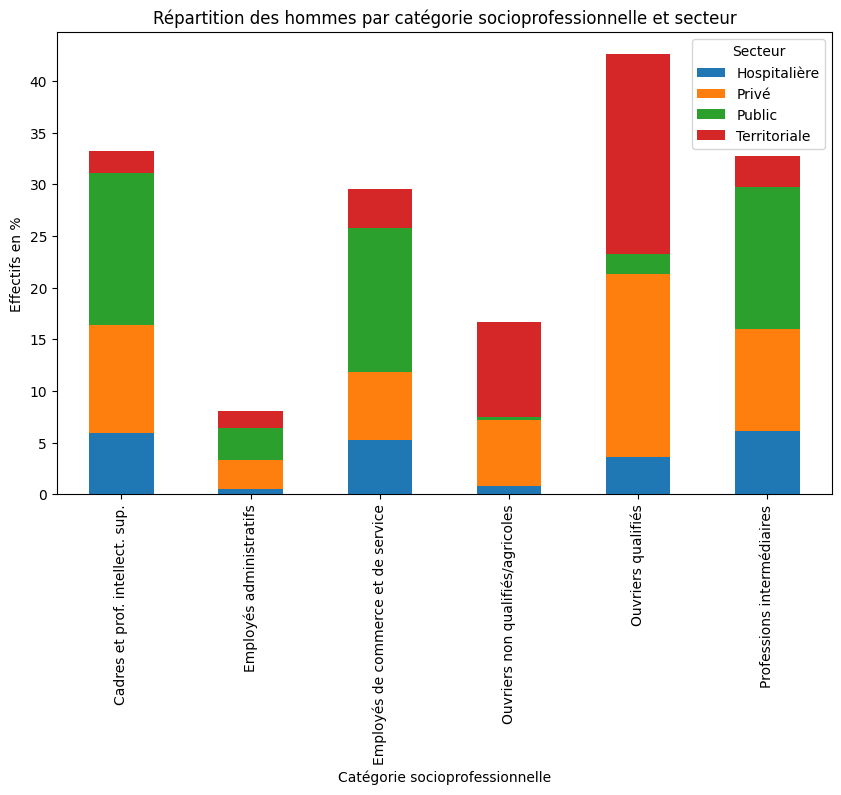

In [230]:
df_pivot = dfProfilCateg.pivot(index='Cat. socioprofessionnelle', columns='Secteur', values='Hommes')
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des hommes par catégorie socioprofessionnelle et secteur")
plt.xlabel("Catégorie socioprofessionnelle")
plt.ylabel("Effectifs en %")
plt.legend(title="Secteur")
plt.show()

Répartition des femmes par catégorie et par secteur

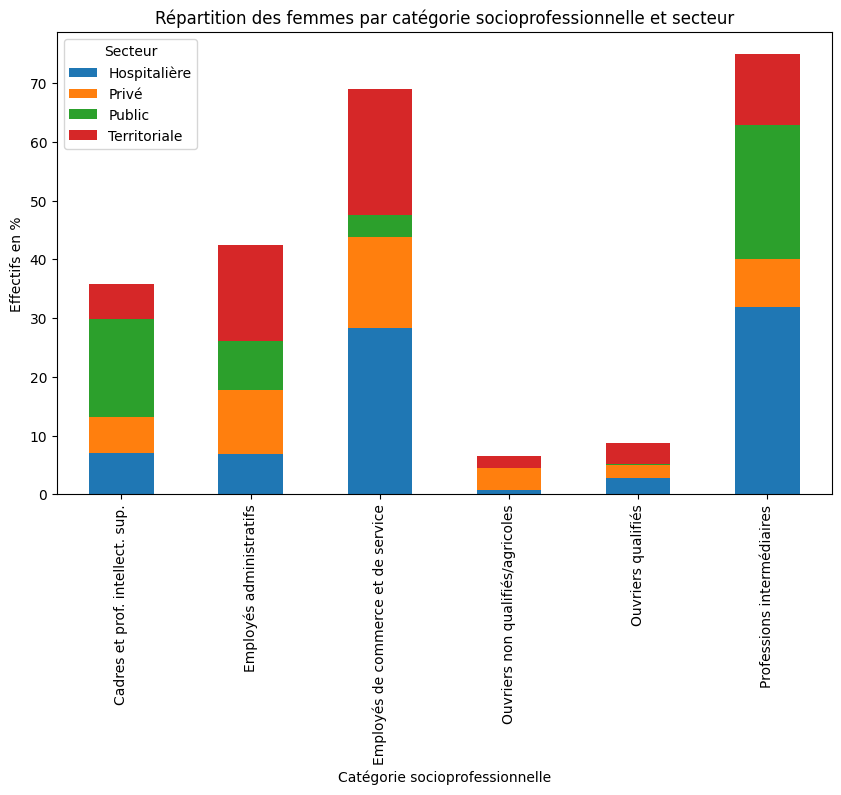

In [231]:
df_pivot = dfProfilCateg.pivot(index='Cat. socioprofessionnelle', columns='Secteur', values='Femmes')
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des femmes par catégorie socioprofessionnelle et secteur")
plt.xlabel("Catégorie socioprofessionnelle")
plt.ylabel("Effectifs en %")
plt.legend(title="Secteur")
plt.show()

Répartition des employés par tranche d'âge dans le secteur privé

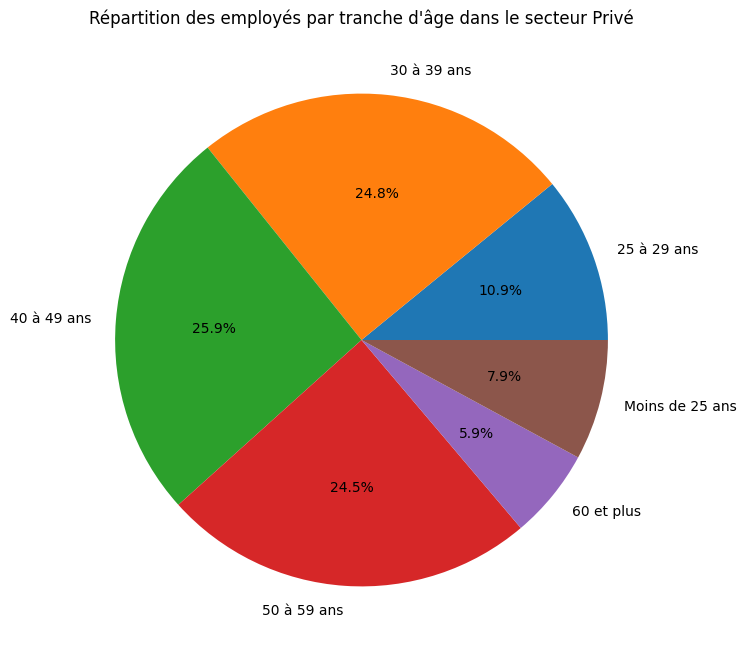

In [232]:
secteur = "Privé"
data_sector = dfProfilAge[dfProfilAge["Secteur"] == secteur].groupby("Tranche d'âge")[["Hommes", "Femmes"]].sum().sum(axis=1)

data_sector.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title(f"Répartition des employés par tranche d'âge dans le secteur {secteur}")
plt.ylabel("")
plt.show()

Comparaison des expositions par secteur

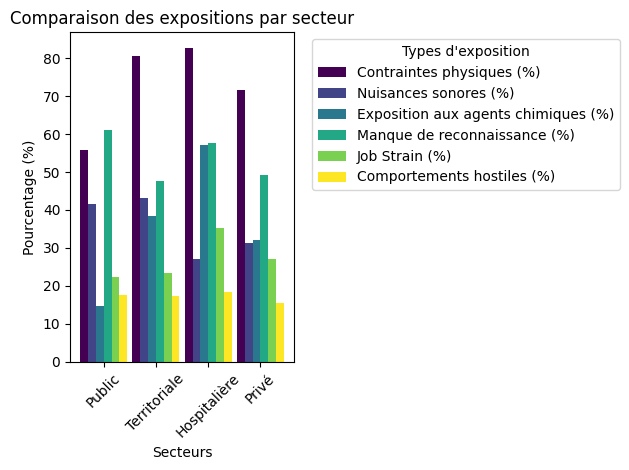

In [233]:
data_to_plot = dfExpo[
    ["Contraintes physiques (%)", "Nuisances sonores (%)", "Exposition aux agents chimiques (%)",
     "Manque de reconnaissance (%)", "Job Strain (%)", "Comportements hostiles (%)"]
]

indices = np.arange(len(dfExpo))

bar_width = 0.15

colors = plt.cm.viridis(np.linspace(0, 1, len(data_to_plot.columns)))

for i, column in enumerate(data_to_plot.columns):
    plt.bar(indices + i * bar_width - (len(data_to_plot.columns) / 2 - 0.5) * bar_width,
            data_to_plot[column], bar_width, label=column, color=colors[i])

plt.title("Comparaison des expositions par secteur")
plt.xlabel("Secteurs")
plt.ylabel("Pourcentage (%)")
plt.xticks(indices, dfExpo.index, rotation=45)
plt.legend(title="Types d'exposition", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()